In [ ]:
#Keras
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
data = pd.read_csv("/EmployeeAttrition.csv")

In [ ]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df = pd.DataFrame(data[["Age","Attrition","StandardHours","TotalWorkingYears"]])

In [ ]:
df.head(5)

,Age,Attrition,StandardHours,TotalWorkingYears
0,41,Yes,80,8
1,49,No,80,10
2,37,Yes,80,7
3,33,No,80,8
4,27,No,80,6


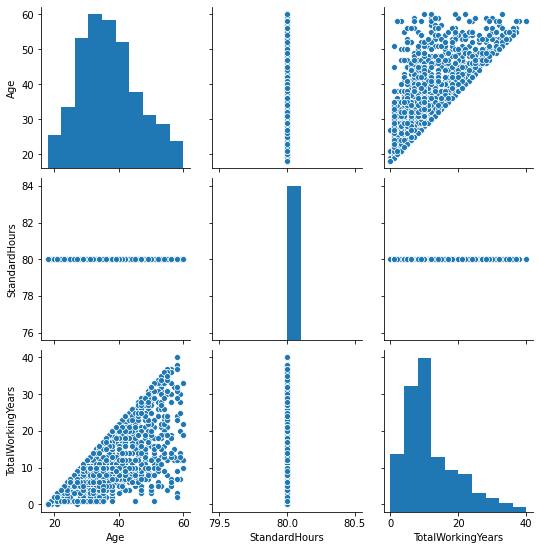

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[["StandardHours","TotalWorkingYears"]].values

In [ ]:
y = df["Age"].values

In [ ]:
X

array([[80,  8],
       [80, 10],
       [80,  7],
       ...,
       [80,  6],
       [80, 17],
       [80,  6]])

In [ ]:
y

array([41, 49, 37, ..., 27, 49, 34])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(1029, 2)

In [ ]:
X_test.shape

(441, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:5]

array([[0.   , 0.8  ],
       [0.   , 0.175],
       [0.   , 0.025],
       [0.   , 0.8  ],
       [0.   , 0.45 ]])

In [ ]:
X_train.max()

1.0

In [ ]:
X_train.min()

0.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#help(Sequential)

In [ ]:
model = Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1))

In [ ]:
model.compile(optimizer="rmsprop",loss="mse")

In [ ]:
model.fit(x=X_train,y=y_train,epochs=1000)

Epoch 1/1000
33/33 [==============================] - 0s 1ms/step - loss: 1446.4243
Epoch 2/1000
33/33 [==============================] - 0s 1ms/step - loss: 1443.8641
Epoch 3/1000
33/33 [==============================] - 0s 1ms/step - loss: 1441.4326
Epoch 4/1000
33/33 [==============================] - 0s 2ms/step - loss: 1439.0031
Epoch 5/1000
33/33 [==============================] - 0s 1ms/step - loss: 1436.5831
Epoch 6/1000
33/33 [==============================] - 0s 1ms/step - loss: 1434.1625
Epoch 7/1000
33/33 [==============================] - 0s 1ms/step - loss: 1431.7378
Epoch 8/1000
33/33 [==============================] - 0s 1ms/step - loss: 1429.3235
Epoch 9/1000
33/33 [==============================] - 0s 1ms/step - loss: 1426.9078
Epoch 10/1000
33/33 [==============================] - 0s 1ms/step - loss: 1424.5054
Epoch 11/1000
33/33 [==============================] - 0s 1ms/step - loss: 1422.0901
Epoch 12/1000
33/33 [==============================] - 0s 1ms/step - loss:

In [ ]:
loss = pd.DataFrame(model.history.history)

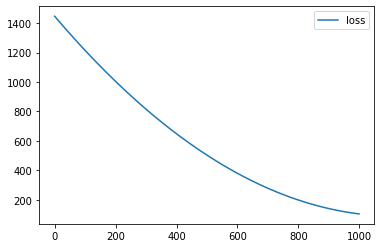

In [ ]:
loss.plot()

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

96.39242553710938

In [ ]:
model.evaluate(X_train,y_train,verbose=0)

103.78852081298828

In [ ]:
pred=model.predict(X_test)
testpred = pd.Series(pred.reshape(441,))
testpred

0      32.661015
1      32.661015
2      32.661015
3      32.661015
4      32.661015
         ...    
436    32.661015
437    32.661015
438    32.661015
439    32.661015
440    32.661015
Length: 441, dtype: float32

In [ ]:
ytest = pd.Series(y_test)
ytest

0      28
1      53
2      24
3      45
4      36
       ..
436    33
437    27
438    28
439    39
440    35
Length: 441, dtype: int64

In [ ]:
output = pd.concat([ytest,testpred],axis=1)
output.columns=["Actual","Predicted"]

In [ ]:
output

,Actual,Predicted
0,28,32.661015
1,53,32.661015
2,24,32.661015
3,45,32.661015
4,36,32.661015
...,...,...
436,33,32.661015
437,27,32.661015
438,28,32.661015
439,39,32.661015


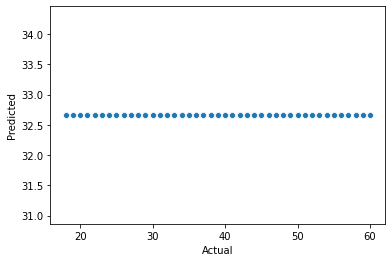

In [ ]:
sns.scatterplot(x="Actual",y="Predicted",data=output)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(output["Actual"],output["Predicted"])

7.533956730987479

In [ ]:
df.describe()

,Age,StandardHours,TotalWorkingYears
count,1470.000000,1470.0,1470.000000
mean,36.923810,80.0,11.279592
std,9.135373,0.0,7.780782
min,18.000000,80.0,0.000000
25%,30.000000,80.0,6.000000
50%,36.000000,80.0,10.000000
75%,43.000000,80.0,15.000000
max,60.000000,80.0,40.000000


In [ ]:
from tensorflow.keras.models import load_model
model.save("temp.h5")